In [126]:
import pandas 
import os, scipy
import numpy as np
import seaborn as sns
sns.set_style("white") 
import scipy.signal as signal
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [127]:
# load subject names
reportPath = '/Users/biota/Desktop/sSL/general/data_analyses/data/selfReportData/'
tmpFiles = os.listdir(reportPath)
subjectNames = []

for file in tmpFiles: 
    if str.find(file, 'part1') != -1: 
        subjectNames.append(file[0:-10])

# load question names to search for
selfReportPath = '/Users/biota/Desktop/sSL/general/data_analyses/data/selfReportData/'
fileNames = os.listdir(selfReportPath)

this = np.load('%s/%s'%(selfReportPath,fileNames[3])).item()
day2Q = list(this.keys())

this = np.load('%s/%s'%(selfReportPath,fileNames[2])).item()
day1Q = list(this.keys())

days = [day1Q,day2Q]

In [128]:
selfReport = pandas.DataFrame({'subject names':subjectNames})

for iDay in range(0,len(days)): 
    for iQ in range(0,len(days[iDay])): 
        q = days[iDay][iQ]
        iResponse = [None] * len(subjectNames) # np.empty(len(subjectNames)) * np.nan
        for iSubject in range(0,len(subjectNames)):
            for iFile in fileNames:
                if str.find(iFile, subjectNames[iSubject]) != -1:
                    try: 
                        tmp = np.load('%s%s'%(selfReportPath,iFile)).item()
                        for iQ in range(0,len(tmp)):
                            if list(tmp.keys())[iQ] == q:
                                iResponse[iSubject] = list(tmp.values())[iQ]
                    except: 
                        #print('excluding an entry from %s'%subjectNames[iSubject])
                        pass
        
        selfReport[q] = iResponse

In [129]:
# clean up some of the errors people made entering the data
selfReport['pre: voltage'][8] = 10 # or could have been 1.1
selfReport['pre: voltage'][2] = 7
selfReport['pre: voltage'][4] = 5. 
selfReport['pre: voltage'][46] = 5
selfReport['pre: voltage'][17] = nan; 
# selfReport['pre: voltage'][25] = nan; 
# selfReport['pre: voltage'][32] = nan; 
selfReport['pre: voltage'] = pandas.to_numeric(selfReport['pre: voltage']); 
selfReport['pre: voltage'][35] = selfReport['pre: voltage'][35]/10
selfReport['pre: voltage'][38] = selfReport['pre: voltage'][38]/10
selfReport['pre: voltage'][51] = selfReport['pre: voltage'][51]/10

####
selfReport['correct color'] = (selfReport['post: color'] == 'red')
selfReport['believe'] = (selfReport['belief'] == 'yes')

In [130]:
within_trial = selfReport

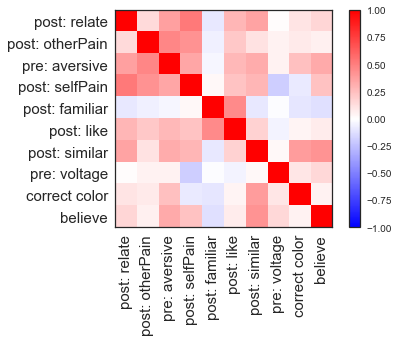

In [131]:
plt.imshow(within_trial.corr(), cmap='bwr')
plt.xticks(range(len(within_trial.corr().keys())), within_trial.corr().keys(), rotation=90, fontsize=15)
plt.yticks(range(len(within_trial.corr().keys())), within_trial.corr().keys(), fontsize=15); 
plt.clim(-1,1)
plt.colorbar(); 

In [132]:
# load subject data from csv file--downloaded from qualtrics 
path2questionnaires = '/Users/biota/Desktop/sSL/general/data_analyses/data/selfReportData/IRI_allSubjects.csv'
subjectInfo = pandas.read_csv(path2questionnaires,sep='comma')

# prep data structures
IRI = []
subjectNamesIRI = []

# extract each subject's responses
for iSubject in range(2,len(subjectInfo)): 
    this = subjectInfo.values[iSubject][0]
    startInd = str.find(this,'anonymous')+10
    endInd = startInd + 55
    answer = (this[startInd:endInd:2])
    inds = [i for i in range(len(this)) if this.startswith(',', i)]
    who = this[int(inds[-1])+1:len(this)]
    IRI.append([answer,who])
    subjectNamesIRI.append(who)

inventoryNames = ['perspective-taking', # PT 
                  'fantasy',            # FS
                  'empathic concern',   # EC
                  'personal distress']  # PD

# recreate question order 
questions = ['FS', # 1. I daydream and fantasize, with some regularity, about things that might happen to me.
             'EC', # 2. I often have tender, concerned feelings for people less fortunate than me. 
             'PT-',# 3. I sometimes find it difficult to see things from the "other guy's" point of view. (PT) (-) 
             'EC', # 4. Sometimes I don't feel very sorry for other people when they are having problems. (EC) (-)
             'FS', # 5. I really get involved with the feelings of the characters in a novel. (FS)
             'PD', # 6. In emergency situations, I feel apprehensive and ill-at-ease. (PD)
             'FS-',# 7. I am usually objective when I watch a movie or play, and I don't often get completely caught up in it. (FS) (-)
             'PT', # 8. I try to look at everybody's side of a disagreement before I make a decision. (PT)
             'EC', # 9. When I see someone being taken advantage of, I feel kind of protective towards them. (EC)
             'PD', # 10. I sometimes feel helpless when I am in the middle of a very emotional situation. (PD)
             'PT', # 11. I sometimes try to understand my friends better by imagining how things look from their perspective. (PT)
             'FS-',# 12. Becoming extremely involved in a good book or movie is somewhat rare for me. (FS) (-) 
             'PD-',# 13. When I see someone get hurt, I tend to remain calm. (PD) (-)
             'EC-',# 14. Other people's misfortunes do not usually disturb me a great deal. (EC) (-)
             'PT-',# 15. If I'm sure I'm right about something, I don't waste much time listening to other people's arguments. (PT) (-)
             'FS', # 16. After seeing a play or movie, I have felt as though I were one of the characters. (FS)
             'PD', # 17. Being in a tense emotional situation scares me. (PD)
             'EC-',# 18. When I see someone being treated unfairly, I sometimes don't feel very much pity for them. (EC) (-)
             'PD-',# 19. I am usually pretty effective in dealing with emergencies. (PD) (-)
             'EC', # 20. I am often quite touched by things that I see happen. (EC)
             'PT', # 21. I believe that there are two sides to every question and try to look at them both. (PT)
             'EC', # 22. I would describe myself as a pretty soft-hearted person. (EC)
             'FS', # 23. When I watch a good movie, I can very easily put myself in the place of a leading character. (FS)
             'PD', # 24. I tend to lose control during emergencies. (PD)
             'PT', # 25. When I'm upset at someone, I usually try to "put myself in his shoes" for a while. (PT) 
             'FS', # 26. When I am reading an interesting story or novel, I imagine how I would feel if the events in the story were happening to me. (FS)
             'PD', # 27. When I see someone who badly needs help in an emergency, I go to pieces. (PD)
             'PT'] # 28. Before criticizing somebody, I try to imagine how I would feel if I were in their place. (PT)

# prep data structures
PT  = [] 
FS  = [] 
EC  = [] 
PD  = []
REV = []

# find indices for each subscale
for iQ in range(0,len(questions)): 
    if   questions[iQ][0:2] == 'PT': 
        PT.append(iQ)
    elif questions[iQ][0:2] == 'FS':
        FS.append(iQ)
    elif questions[iQ][0:2] == 'EC':
        EC.append(iQ)
    elif questions[iQ][0:2] == 'PD':
        PD.append(iQ)
    # items to be reverse scored 
    if questions[iQ][-1] == '-': 
        REV.append(iQ)

In [133]:
# prep data structures
inventory = [PT, FS, EC, PD]
IRIscores = pandas.DataFrame({'subject names':subjectNamesIRI})

for iSubscale in range(0,len(inventory)): 
    testvec = []
    testScale = inventory[iSubscale]
    for iSubject in range(0,len(subjectNamesIRI)): 
        tmpvals = np.zeros(len(testScale))
        testChoice = IRI[iSubject][0]
        for iInd in range(0,len(testScale)): 
            ind = int(testScale[iInd])
            # reverse scaled items: 0 -> 4, 4 -> 0, 3 -> 1, ... 2 -> 2 
            tmpVal = abs((ind in REV) * 4 - int(testChoice[ind]))
            tmpvals[iInd] = int(tmpVal)
        testvec.append(sum(tmpvals))
    IRIscores[inventoryNames[iSubscale]] = testvec

In [134]:
IRIscores = IRIscores.sort_values('subject names')

In [135]:
# visualize distribution of data 
# pandas.tools.plotting.scatter_matrix(IRIscores,alpha=0.4, figsize=(10,10),c='xkcd:blue');

In [136]:
trait_measures = IRIscores

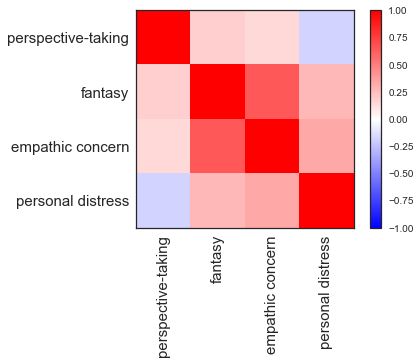

In [137]:
plt.imshow(trait_measures.corr(), cmap='bwr')
plt.xticks(range(len(trait_measures.corr().keys())), trait_measures.corr().keys(), rotation=90, fontsize=15)
plt.yticks(range(len(trait_measures.corr().keys())), trait_measures.corr().keys(), fontsize=15); 
plt.clim(-1,1)
plt.colorbar()

In [138]:
# need to combine the data structures even through the names aren't aligned

In [121]:
for iSubscale in range(0,len(inventory)): 
    tmpScale = []
    for iSubject in range(0,len(selfReport['subject names'])): 
        found=0
        for jSubject in range(0,len(subjectNamesIRI)):
            if str.find(selfReport['subject names'][iSubject],subjectNamesIRI[jSubject]) > -1: 
                tmpScale.append(IRIscores[inventoryNames[iSubscale]][jSubject]); found = 1
        if not found:  
            tmpScale.append(nan)
    selfReport[inventoryNames[iSubscale]] = tmpScale

In [122]:
titleNames = ['post: relate','post: otherPain','pre: aversive','post: selfPain',
              'post: familiar','post: like','post: similar','pre: voltage',
              'correct color','believe model','perspective-taking','fantasy',
              'empathic concern','personal distress']

titleNames = selfReport.corr().keys()

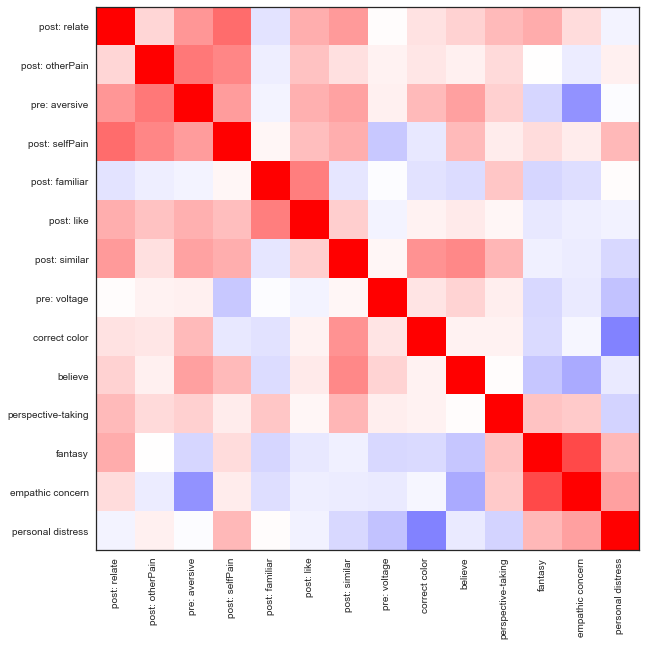

In [123]:
plt.figure(figsize=[20,20])
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches([10,10])
ax = imshow(selfReport.corr())
ax1.set_xticks(np.array(list(range(0,14))))
ax1.set_xticklabels(titleNames,rotation=90); 
ax1.set_yticks(np.array(list(range(0,14))))
ax1.set_yticklabels(titleNames); 
ax.set_cmap('bwr')#'coolwarm')# 'seismic'
ax.set_clim([-.9,.9])
ax.set_alpha(1)

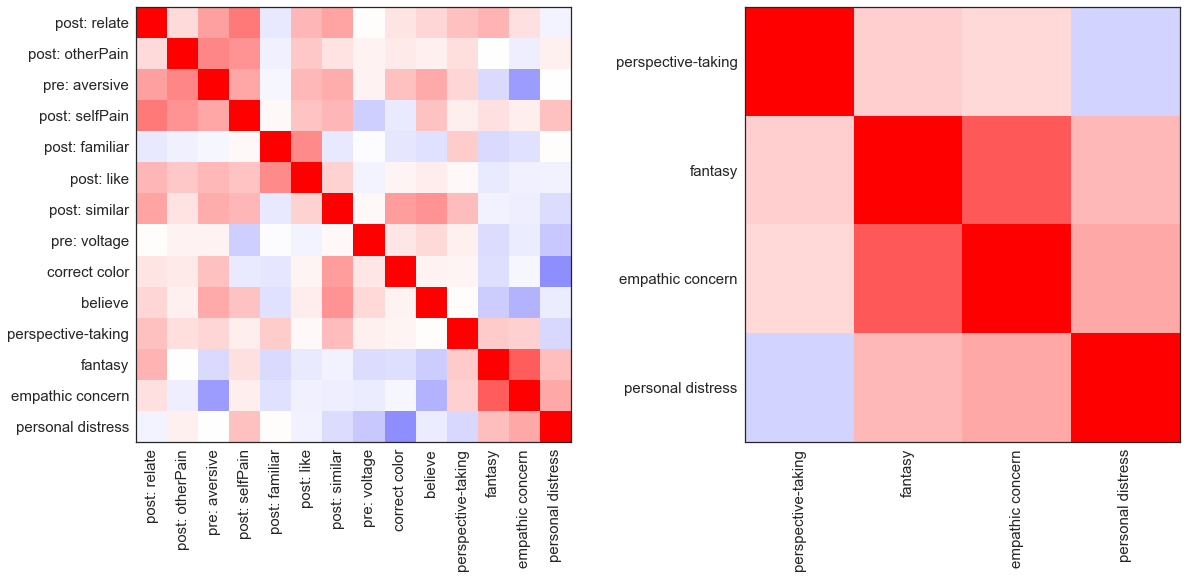

In [124]:
plt.figure(figsize=[20,8])
plt.subplot(121)
plt.imshow(within_trial.corr(), cmap='bwr')
plt.xticks(range(len(within_trial.corr().keys())), within_trial.corr().keys(), rotation=90, fontsize=15)
plt.yticks(range(len(within_trial.corr().keys())), within_trial.corr().keys(), fontsize=15); 
plt.clim(-1,1)
plt.subplot(122)
plt.imshow(trait_measures.corr(), cmap='bwr')
plt.xticks(range(len(trait_measures.corr().keys())), trait_measures.corr().keys(), rotation=90, fontsize=15)
plt.yticks(range(len(trait_measures.corr().keys())), trait_measures.corr().keys(), fontsize=15); 
plt.clim(-1,1)

In [52]:
_tmp_names = [fileNames[ii] for ii in range(len(fileNames)) if 'part1' in fileNames[ii]]

In [53]:
len(_tmp_names)

53